In [26]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [30]:
train_dir = 'C:\\Users\\Ghosh\\Desktop\\dogs_vs_cats\\train' 
test_dir = 'C:\\Users\\Ghosh\\Desktop\\dogs_vs_cats\\test'  
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (50,50))
            img=img/255.0
            img=img.flatten()
            images.append(img)
            labels.append(label)
    return images, labels


In [31]:
cat_images, cat_labels = load_images_from_folder(os.path.join(train_dir, 'cats'), 0)
dog_images, dog_labels = load_images_from_folder(os.path.join(train_dir, 'dogs'), 1)

images = np.array(cat_images + dog_images)
labels = np.array(cat_labels + dog_labels)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.2, random_state=42)

In [33]:
n_components = 0.8
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)

In [34]:
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])

In [35]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.8, random_state=42)),
                ('svm', SVC())])

In [36]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [37]:
print(accuracy)

0.66


In [38]:
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.66      0.66      0.66      2019
         Dog       0.66      0.66      0.66      1981

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.66      0.66      0.66      4000



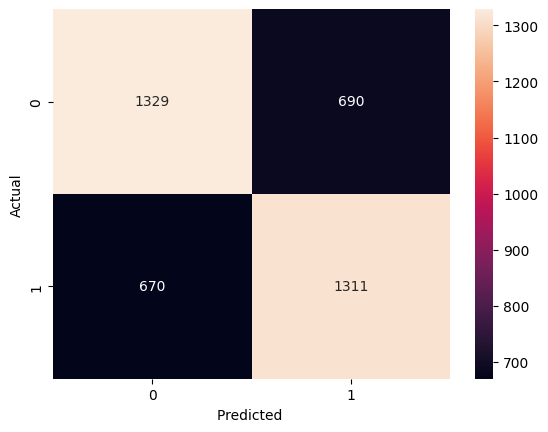

In [39]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted ')
plt.ylabel('Actual')
plt.show()

In [40]:
def preprocess_single_image(image_path, image_size=(50, 50)):
    image_read = cv2.imread(image_path)
    if image_read is not None:
        image_resized = cv2.resize(image_read, image_size)
        image_normalized = image_resized / 255.0
        image_flatten = image_normalized.flatten()
        return image_flatten.reshape(1, -1)  
    else:
        raise ValueError(f"Unable to read the image at {image_path}")

In [41]:
def predict_image_class(image_path):
    preprocessed_image = preprocess_single_image(image_path)
    prediction = pipeline.predict(preprocessed_image)
    class_names = ['cat', 'dog']
    predicted_class = class_names[prediction[0]]
    return predicted_class


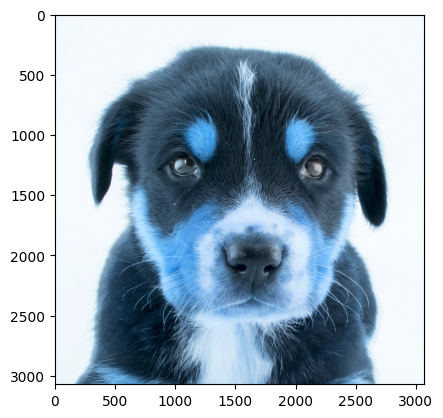

In [44]:
checkimage=cv2.imread("C:\\Users\\Ghosh\\Downloads\\domestic-dog_thumb_square.webp")
plt.imshow(checkimage)

In [45]:
print(predict_image_class("C:\\Users\\Ghosh\\Downloads\\FELV-cat.jpg"))

dog
